In [1]:
from pathlib import Path
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set(style='whitegrid')

In [2]:
path = Path.home() / 'Downloads/2019 Kaggle Survey'
if str(Path.home()) == '/home/kevin':
    path = Path.home() / 'Downloads/kaggle-survey-2019'

df_responses = (
    pl.read_csv(path / 'multiple_choice_responses.csv')
    .with_row_index()
)
columns = [str(i).lower() for i in df_responses.row(0)]
dict_question = {i: v for i, v in zip(df_responses.columns, columns)}
df_responses = df_responses.filter(pl.col('index') > 0)
df_responses.columns = columns

df_responses.head()

0,duration (in seconds),what is your age (# years)?,what is your gender? - selected choice,what is your gender? - prefer to self-describe - text,in which country do you currently reside?,what is the highest level of formal education that you have attained or plan to attain within the next 2 years?,select the title most similar to your current role (or most recent title if retired): - selected choice,select the title most similar to your current role (or most recent title if retired): - other - text,what is the size of the company where you are employed?,approximately how many individuals are responsible for data science workloads at your place of business?,does your current employer incorporate machine learning methods into their business?,select any activities that make up an important part of your role at work: (select all that apply) - selected choice - analyze and understand data to influence product or business decisions,"select any activities that make up an important part of your role at work: (select all that apply) - selected choice - build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",select any activities that make up an important part of your role at work: (select all that apply) - selected choice - build prototypes to explore applying machine learning to new areas,select any activities that make up an important part of your role at work: (select all that apply) - selected choice - build and/or run a machine learning service that operationally improves my product or workflows,select any activities that make up an important part of your role at work: (select all that apply) - selected choice - experimentation and iteration to improve existing ml models,select any activities that make up an important part of your role at work: (select all that apply) - selected choice - do research that advances the state of the art of machine learning,select any activities that make up an important part of your role at work: (select all that apply) - selected choice - none of these activities are an important part of my role at work,select any activities that make up an important part of your role at work: (select all that apply) - selected choice - other,select any activities that make up an important part of your role at work: (select all that apply) - other - text,what is your current yearly compensation (approximate $usd)?,approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - twitter (data science influencers),who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - hacker news (https://news.ycombinator.com/),"who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - reddit (r/machinelearning, r/datascience, etc)","who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - kaggle (forums, blog, social media, etc)","who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - course forums (forums.fast.ai, etc)","who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - youtube (cloud ai adventures, siraj raval, etc)","who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - podcasts (chai time data science, linear digressions, etc)","who/what are your favorite media sources that report on data science topics? (select all that apply) - selected choice - blogs (towards data science, medium, analytics vidhya, kdnuggets etc)","who/what are your favorite media sources that report on data science topics? (select

In [3]:
ide_usage = [f'Q16_Part_{i}' for i in range(1, 11)]
notebook_usage = [f'Q17_Part_{i}' for i in range(1, 11)]
language_usage = [f'Q18_Part_{i}' for i in range(1, 11)]
visual_usage = [f'Q20_Part_{i}' for i in range(1, 11)]
algo_usage = [f'Q24_Part_{i}' for i in range(1, 11)]
ml_tools_usage = [f'Q25_Part_{i}' for i in range(1, 7)]
cv_usage = [f'Q26_Part_{i}' for i in range(1, 6)]
nlp_usage = [f'Q27_Part_{i}' for i in range(1, 5)]
ml_frameworks_usage = [f'Q28_Part_{i}' for i in range(1, 11)]
cloud_platforms_usage = [f'Q29_Part_{i}' for i in range(1, 11)]
cloud_products_usage = [f'Q30_Part_{i}' for i in range(1, 11)]
big_data_products_usage = [f'Q31_Part_{i}' for i in range(1, 11)]
ml_products_usage = [f'Q32_Part_{i}' for i in range(1, 11)]
automl_tools = [f'Q33_Part_{i}' for i in range(1, 11)]
db_tools = [f'Q34_Part_{i}' for i in range(1, 11)]

skills_questions = [
    ide_usage, notebook_usage, language_usage, visual_usage, algo_usage,
    ml_tools_usage, cv_usage, nlp_usage, 
    ml_frameworks_usage, cloud_platforms_usage, big_data_products_usage,
    ml_products_usage, automl_tools, db_tools
]
skills_questions = sum(skills_questions, [])
skills_questions = [dict_question.get(i) for i in skills_questions]

In [4]:
df_skills = df_responses.select(skills_questions)
print(df_skills.shape)
df_skills = df_skills.filter(~pl.all_horizontal(pl.all().is_null()))
print(df_skills.shape)
df_skills.head()

(19717, 125)
(14576, 125)


"which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - jupyter (jupyterlab, jupyter notebooks, etc)",which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - rstudio,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - pycharm,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - atom,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - matlab,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - visual studio / visual studio code,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - spyder,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - vim / emacs,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - notepad++,which of the following integrated development environments (ide's) do you use on a regular basis? (select all that apply) - selected choice - sublime text,which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - kaggle notebooks (kernels),which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - google colab,which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - microsoft azure notebooks,"which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - google cloud notebook products (ai platform, datalab, etc)",which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - paperspace / gradient,which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - floydhub,which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - binder / jupyterhub,which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - ibm watson studio,which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - code ocean,"which of the following hosted notebook products do you use on a regular basis? (select all that apply) - selected choice - aws notebook products (emr notebooks, sagemaker notebooks, etc)",what programming languages do you use on a regular basis? (select all that apply) - selected choice - python,what programming languages do you use on a regular basis? (select all that apply) - selected choice - r,what programming languages do you use on a regular basis? (select all that apply) - selected choice - sql,what programming languages do you use on a regular basis? (select all that apply) - selected choice - c,what programming languages do you use on a regular basis? (select all that apply) - selected choice - c++,what programming languages do you use on a regular basis? (select all that apply) - selected choice - java,what programming languages do you use on a regular basis? (select all that apply) - selected choice - javascript,what programming languages do you use on a regular basis? (select all that apply) - selected choice - typescript,what programming languages do you use on a regular basis? (sele

In [5]:
df = pl.DataFrame()
for raw_str in skills_questions:
    tmp = (
        df_skills[[raw_str]]
        .with_columns(pl.when(~pl.col(raw_str).is_null()).then(1).otherwise(0).name.keep())
    )
    
    string = raw_str.split('selected choice -')[-1]
    if 'matlab' in raw_str:
        if 'ide' in raw_str:
            string += 'ide'
        else:
            string += ' language'
            
    string = re.sub(r"[\(\[].*?[\)\]]", "", string.split('selected choice - ')[-1]).strip()
    string = re.sub(r"\s+", " ", string)
    # print(raw_str, ' ==> ', string)
    
    tmp.columns = [string]
    df = pl.concat([df, tmp], how='horizontal')
    # break

In [6]:
SELECTED_SKILLS = [i for i, v in df.sum().to_dicts()[0].items() if v > 500]
SELECTED_SKILLS[:3]

['jupyter', 'rstudio', 'pycharm']

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import igraph


q_threshold = .95
similarity_matrix = cosine_similarity(df.select(SELECTED_SKILLS))
threshold = np.quantile(np.concatenate(similarity_matrix), q_threshold)

similarity_matrix[similarity_matrix < threshold] = 0
similarity_matrix[similarity_matrix >= threshold] = 1
np.fill_diagonal(similarity_matrix, 0)

In [8]:
G = igraph.Graph.Adjacency((similarity_matrix > 0).tolist())
G.to_undirected()
G.simplify()
# Add vertex objects and connected indicator to intial dataframe
df = df.with_columns(
    pl.Series(name='value', values=list(G.vs)),
    pl.Series(name='connected', values=G.components().membership),
)
# df['connected'] = pd.Series(G.components().membership) == 0

In [9]:
fg = G.community_fastgreedy()
fg = fg.as_clustering()

In [10]:
community_name_dict = {0:'Python and Deep Learning', 1:'R and Classical ML', 2:'Python and Classical ML'}

df = (
    df
    .with_columns(
        pl.Series(name='community', values=[com if com <= 2  else np.nan for com in fg.membership]),
    )
    .with_columns(pl.col('community').replace(community_name_dict, default='Other'))
)


# df['community'] = df['community'].map(community_name_dict)

In [11]:
layout = G.layout("lgl")
# layout = G.layout_fruchterman_reingold(niter=1000, start_temp=10)
degree_list = list(G.degree())
modifed_degree_list = list(map(lambda x: 10 if x >= np.quantile(degree_list, 0.95) else 5, degree_list))
G.vs['size'] = modifed_degree_list

/home/kevin/miniforge3/envs/py312/lib/python3.12/site-packages/igraph/layout.py:691: RuntimeWarning: LGL layout does not support disconnected graphs yet. at src/layout/large_graph.c:174
  layout = func(*args, **kwds)


In [12]:
community_colors = pl.DataFrame(fg.membership).with_columns(pl.col('column_0').replace({i: sns.color_palette('muted')[i][i] for i in range(3)}))
community_colors

column_0
f64
0.282353
0.521569
0.282353
0.521569
0.521569
…
0.282353
0.282353
0.521569


In [13]:
community_colors['column_0'].to_list()

[0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.5215686274509804,
 0.5215686274509804,
 0.5215686274509804,
 0.5215686274509804,
 0.2823529411764706,
 0.2823529411764706,
 0.2823529411764706,
 0.2823529411764706,
 0.2823529411764706,
 0.2823529411764706,
 0.5215686274509804,
 0.5215686274509804,
 0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.5215686274509804,
 0.5215686274509804,
 0.5215686274509804,
 0.5215686274509804,
 0.5215686274509804,
 0.2823529411764706,
 0.2823529411764706,
 0.5215686274509804,
 0.5215686274509804,
 0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.2823529411764706,
 0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.2823529411764706,
 0.2823529411764706,
 0.2823529411764706,
 0.5215686274509804,
 0.2823529411764706,
 0.5215686274

In [14]:
# COLORS_SET_B_G_R = [sns.color_palette('muted')[0], sns.color_palette('muted')[2], sns.color_palette('muted')[3]]
# 
# # Get appropriate colors for communities
# community_colors = pd.Series(fg.membership).map({0:COLORS_SET_B_G_R[0],
#                                                  1:COLORS_SET_B_G_R[1],
#                                                  2:COLORS_SET_B_G_R[2]})
# community_colors = list(community_colors.fillna('lightgrey'))

In [15]:
# sns.color_palette('muted')[2]

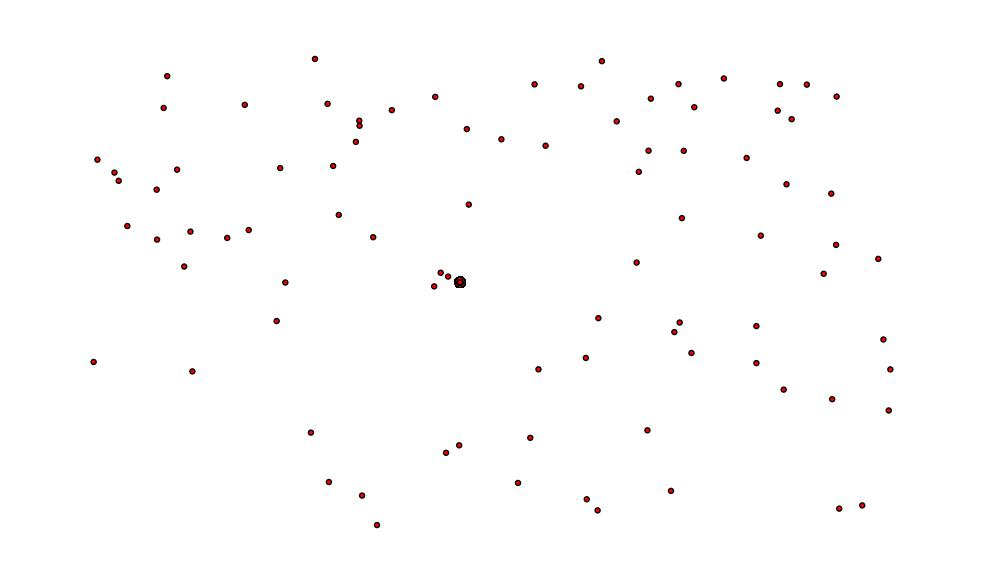

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
igraph.plot(G, target=ax, layout=layout)
fig.tight_layout()

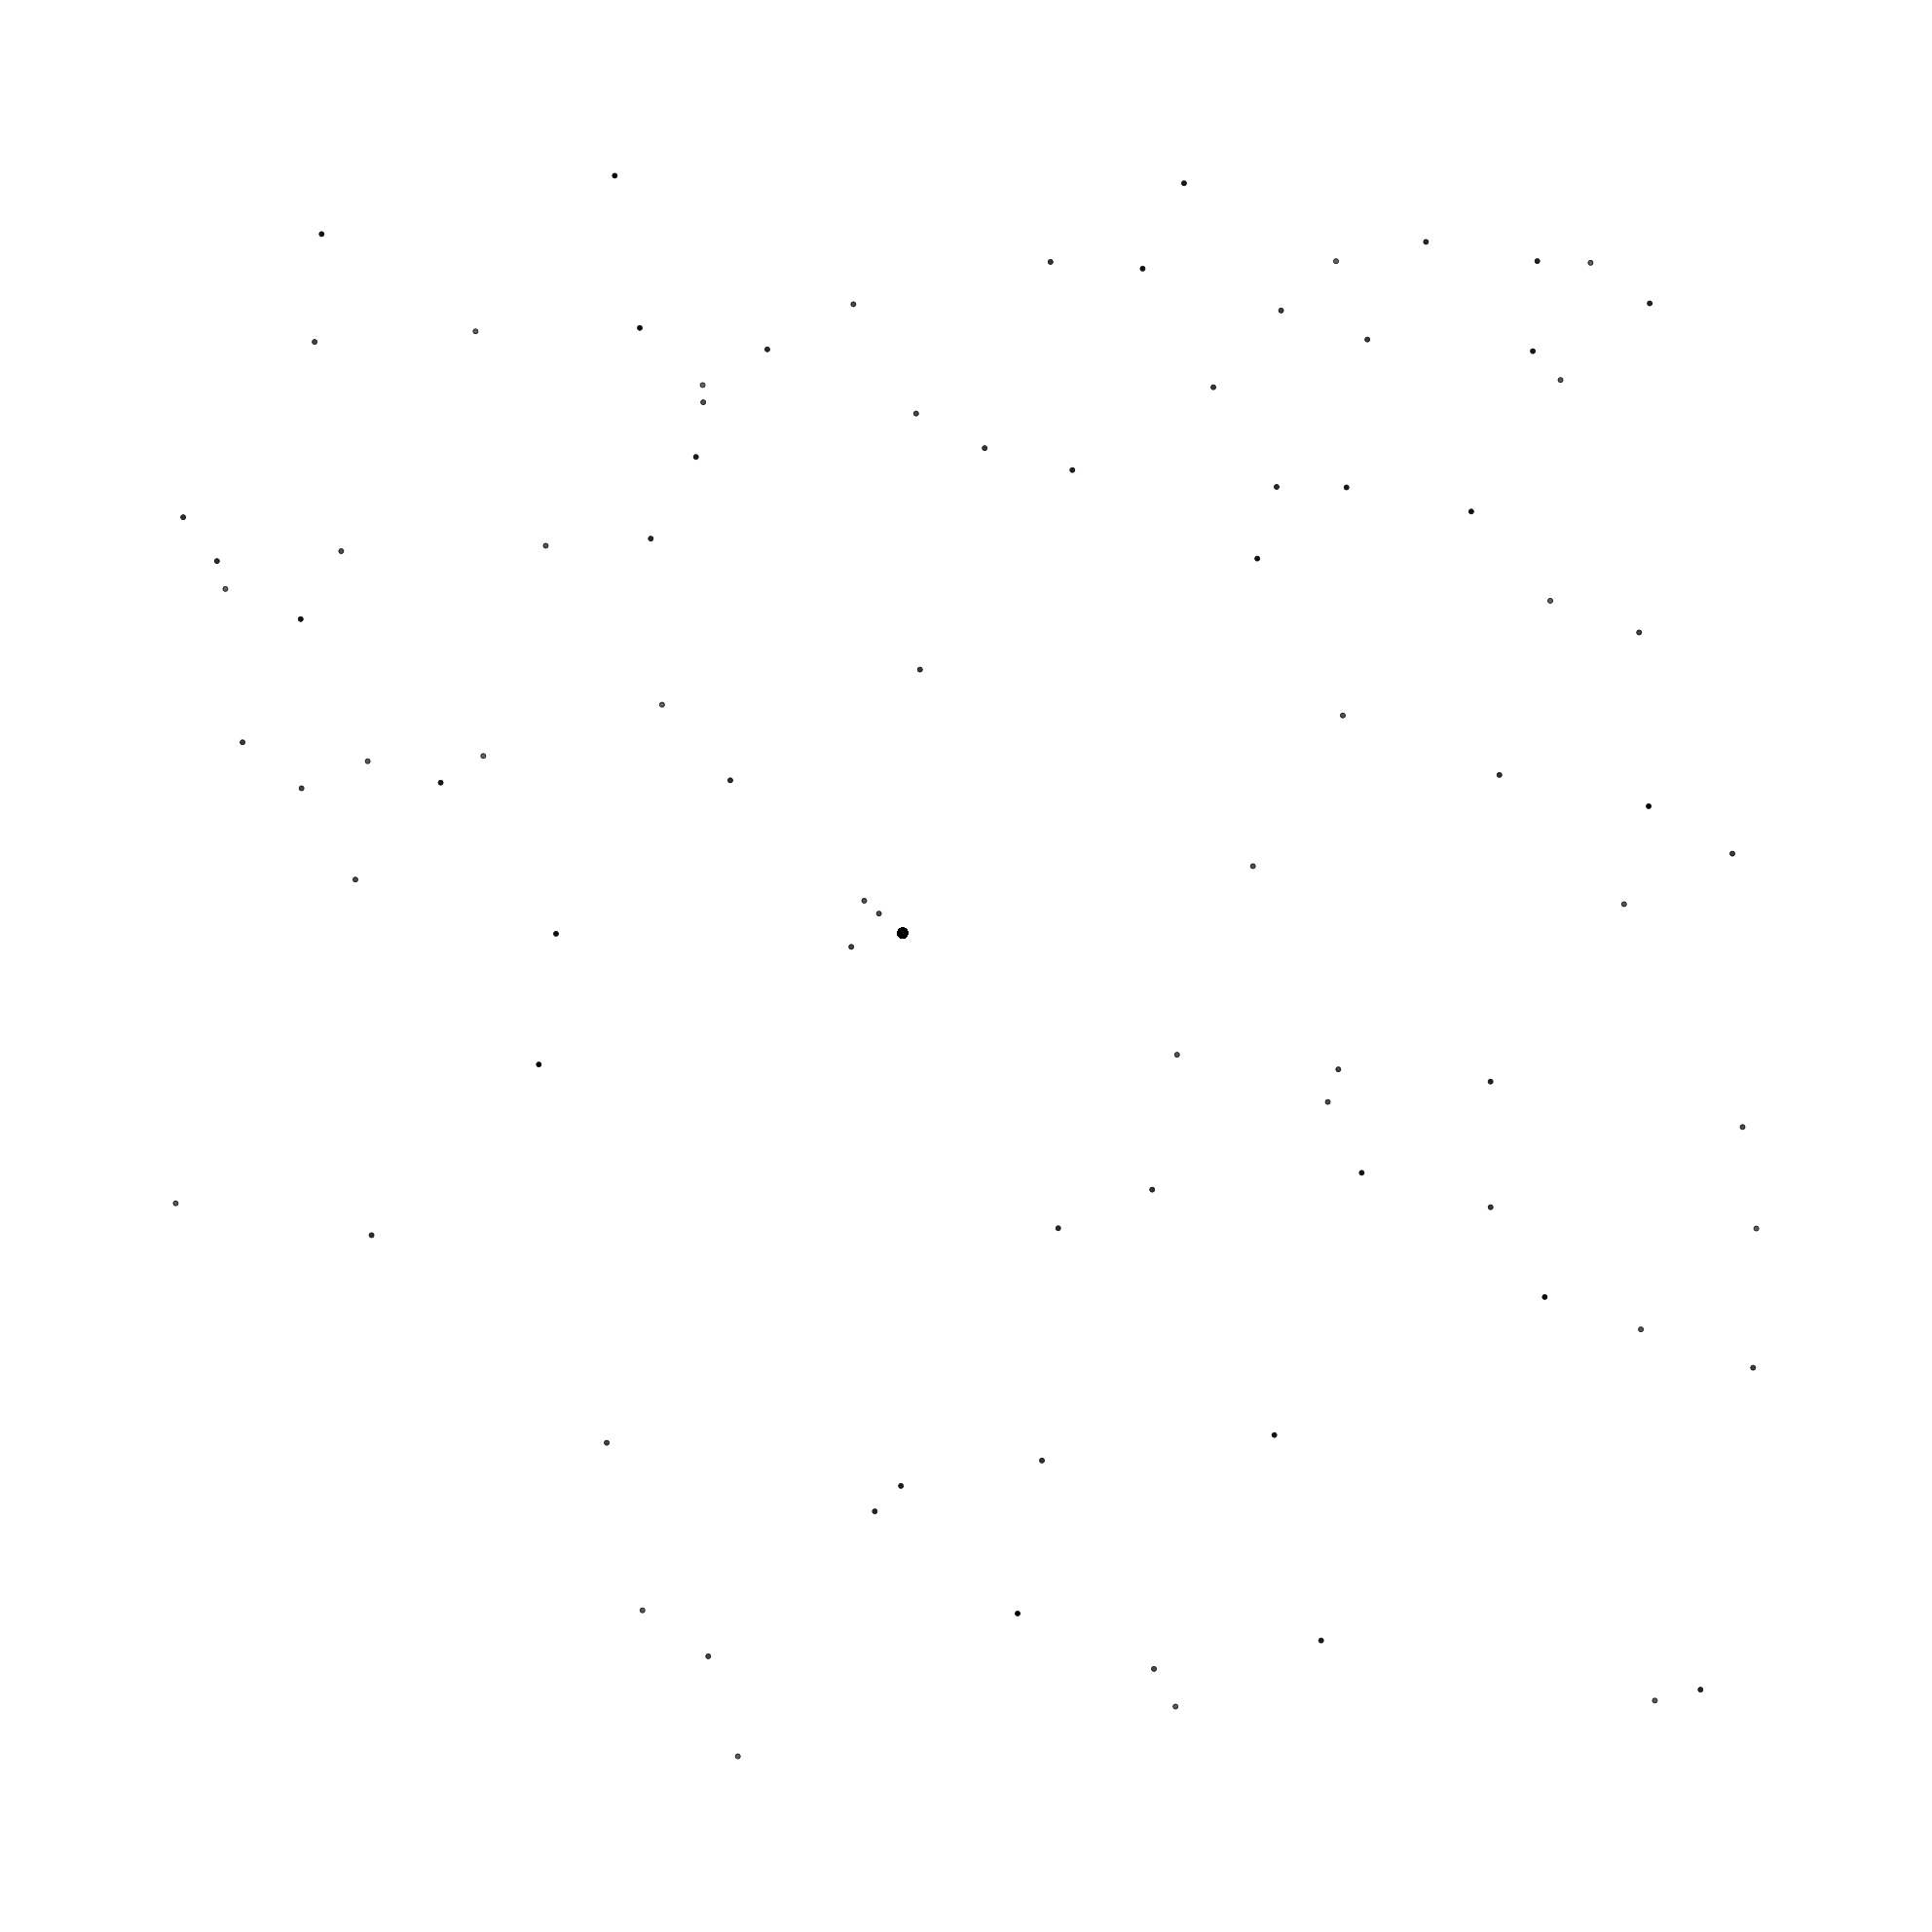

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
igraph.plot(G, target=ax, layout=layout, edge_width=0.2, vertex_frame_width=0.5, vertex_color=community_colors['column_0'].to_list())
fig.tight_layout()